In [297]:
import sys
import numpy as np
import os 
import glob
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_compare = ['rbbm_runtime','bbox_runtime','avg_tree_size_increase','fix_rate','confirm_preserve_rate','new_global_accuracy']

def check_variance(k, col, df):
    """
    k: every k runs check kl-div with previous k 
    col: the column we want to check kl-div
    df: dataframe
    """
    x = len(df) // k 
    chunks = [df.iloc[i * k:(i + 1) * k] for i in range(x)]
#     print(chunks)
    l = len(chunks)
    variances = []
    for i in range(0, l):
        variances.append(chunks[i][col].std())
    return variances

def return_raw_stats(k, col, df):
    """
    k: every k runs check kl-div with previous k 
    col: the column we want to check kl-div
    df: dataframe
    """
    x = len(df) // k 
    chunks = [df.iloc[i * k:(i + 1) * k] for i in range(x)]
#     print(chunks)
    l = len(chunks)
    raw_vals = []
    for i in range(0, l):
        raw_vals.append(chunks[i][col].tolist())
    return raw_vals


def plot_std(data, col, size):
    for key, values in data.items():
        if(key=='size'):
            continue
        plt.plot(range(len(values)), values, label=str(key))
    
#     for y in list(df)[:-1]:
#         plt.plot(df.index, df[y], label=str(y))
    # Add labels and legend
    plt.xlabel('pass')
    plt.ylabel('variance')
    plt.legend(title='input size')
    plt.title(f'size={size}, col={col}')
    # Show the plot
    plt.show()
    
def plot_box_plot(data, col, size):
    for key, values in data.items():
        if(key=='size'):
            continue
        ax = sns.boxplot(data=data, x=range(len(values)), y=y, hue='strat', hue_order=strat_list)
    
#     for y in list(df)[:-1]:
#         plt.plot(df.index, df[y], label=str(y))
    # Add labels and legend
    plt.xlabel('pass')
    plt.ylabel('variance')
    plt.legend(title='input size')
    plt.title(f'size={size}, col={col}')
    # Show the plot
    plt.show()

In [298]:
l = glob.glob('experiment_results_folders/variance/naive/*/*experiment_stats')

In [299]:
df = pd.concat([pd.read_csv(f) for f in l])

In [300]:
df.shape

(2500, 25)

In [301]:
def visualize_variance(target_column, chuncksizes, df):
            
    list_dicts = [{x: None for x in list(df['user_input_size'].unique())} for i in range(len(chuncksizes))]
#     print(list_dicts)
    groups = df.groupby('user_input_size')
    
    for i in range(len(chuncksizes)):
        cur_dic = list_dicts[i]
        for size, group in groups:
            cur_dic[size] = check_variance(chuncksizes[i],target_column, group)
            cur_dic['size'] = chuncksizes[i]

    for dc in list_dicts:
        plot_std(dc,target_column, dc['size'])
#         print(dc)

In [302]:
chuncksizes = [10,20, 30, 40, 50, 60, 80]

In [303]:
df_information=df[df['strat']=='information_gain']
df_naive=df[df['strat']=='naive']

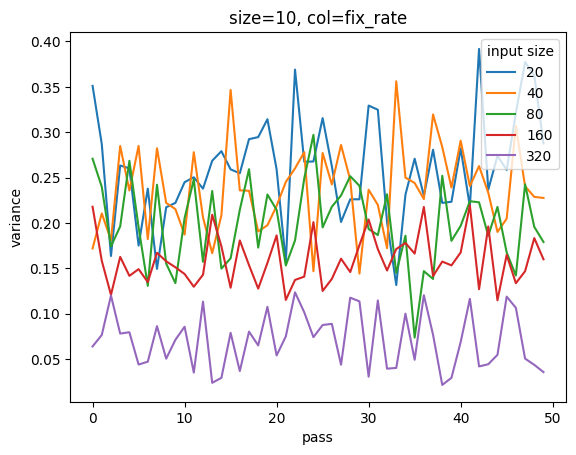

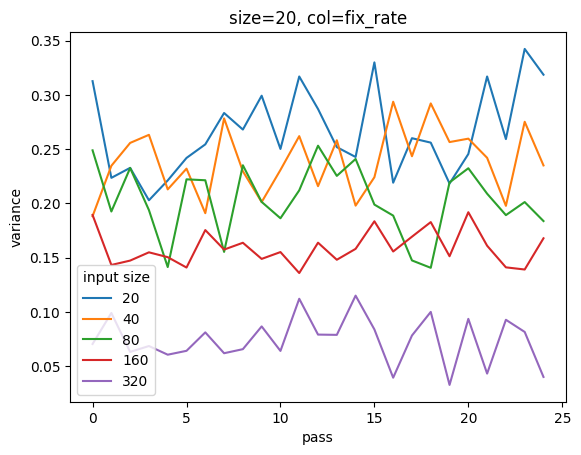

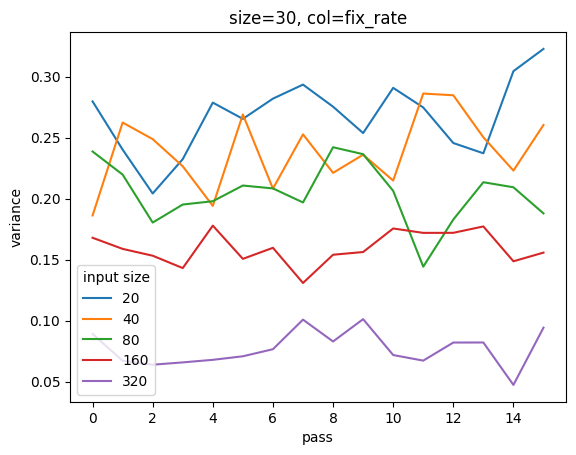

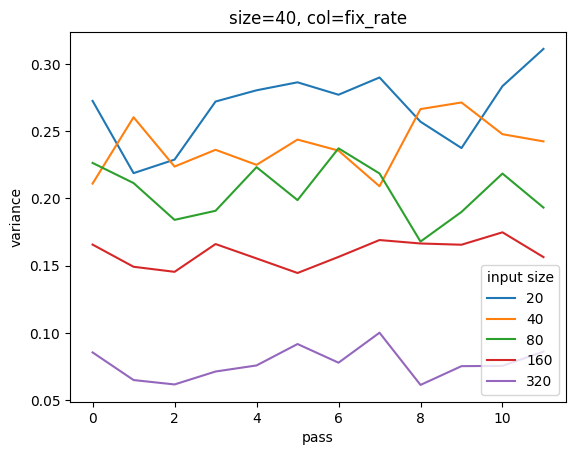

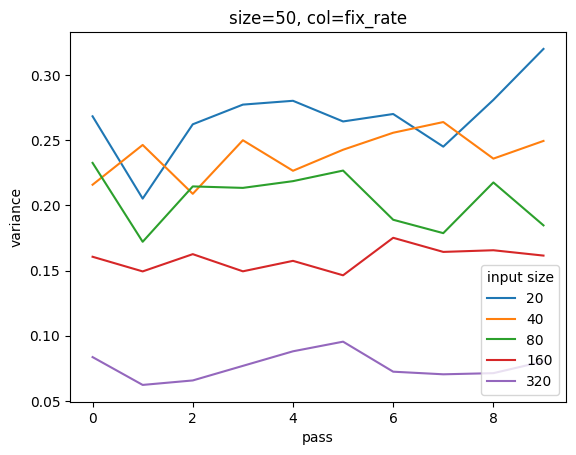

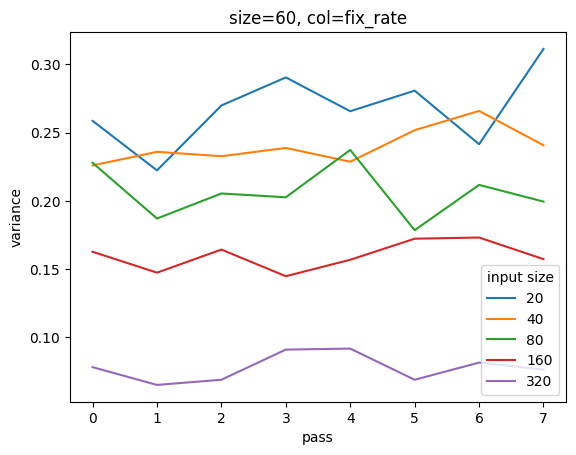

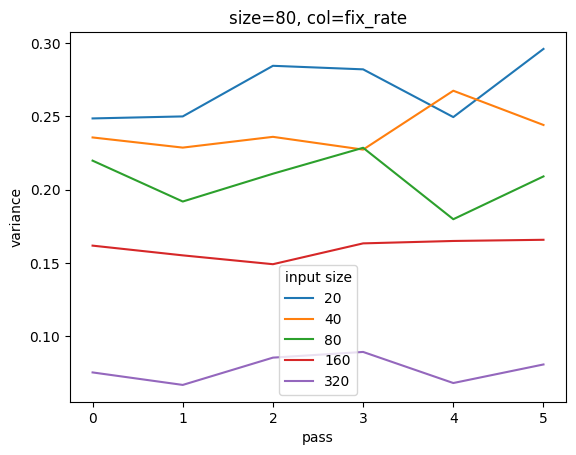

In [305]:
# visualize_variance('fix_rate', chuncksizes, df_information)
visualize_variance('fix_rate', chuncksizes, df_naive)


In [306]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


def visualize_dist_boxplot(target_column, chuncksizes, df):
            
    list_dicts = [{x: None for x in list(df['user_input_size'].unique())} for i in range(len(chuncksizes))]
#     print(list_dicts)
    groups = df.groupby('user_input_size')
    
    for i in range(len(chuncksizes)):
        cur_dic = list_dicts[i]
        for size, group in groups:
            cur_dic[size] = return_raw_stats(chuncksizes[i],target_column, group)
            cur_dic['size'] = chuncksizes[i]


    # Define colors for 'x', 'y', and 'z'
    colors = {20:'red',40:'green',80:'blue',160:'yellow',320:'purple'}

    # Create box plots for each dictionary 'd' in 'dics'
    for d in list_dicts:
        fig = plt.figure(figsize=(20, 6))  # Adjust the width and height as needed
        x_positions = np.arange(1, len(d[20]) + 1)  # x-axis positions for box plots
        for key in list(d):
            data = d[key]
#             labels = [f'{key}_{i}' for i in range(1, len(data) + 1)]
            # Explicitly cast 'x_positions' to float before addition
            x_positions = x_positions.astype('float64') + 0.1
            if(key!='size'):
                plt.boxplot(data, positions=x_positions, patch_artist=True, boxprops=dict(facecolor=colors[key]))

        # Create custom color patches for the legend
        legend_patches = [mpatches.Patch(color=color, label=key) for key, color in colors.items()]

        # Add labels and legend
        plt.xlabel('Elements')
        plt.ylabel('Values')
        plt.xticks(list(range(0,20)))
        plt.title('Box Plots')
        plt.legend(handles=legend_patches, title='Key')

        # Show the plot
        plt.show()

In [ ]:
chuncksizes

In [ ]:
visualize_dist_boxplot('fix_rate', chuncksizes, df_information)